## Selecting number of clusters 

In [1]:
#import sys
#!{sys.executable} -m pip install kneed

In [2]:
!pip install --upgrade kneed

In [4]:
# sklearn imports
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# import knee detection algorithm
from kneed import KneeLocator


# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [5]:
# start the assignment 3

In [26]:
df = pd.read_csv("Diabetes_classification.csv")

In [27]:
df

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [28]:
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [29]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [30]:
df= df.replace(to_replace="F", value = 0)
df= df.replace(to_replace="f", value = 0)
df= df.replace(to_replace="M", value = 1)
df

C:\Users\Student\AppData\Local\Temp\ipykernel_50228\2876305497.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace(to_replace="M", value = 1)


,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,1,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,1,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,0,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,0,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,1,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,0,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,1,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,0,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [35]:
df = df.drop(columns=["Diagnosis"])

In [36]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,50,0,24,4.20,0.90,2.40,1.40,46.0,4.70
1,26,1,23,3.70,1.40,1.10,2.10,62.0,4.50
2,33,1,21,4.90,1.00,0.80,2.00,46.0,7.10
3,45,0,21,2.90,1.00,1.00,1.50,24.0,2.30
4,50,0,24,3.60,1.30,0.90,2.10,50.0,2.00
...,...,...,...,...,...,...,...,...,...
5127,54,1,23,5.00,1.50,1.24,2.98,77.0,3.50
5128,50,0,22,4.37,2.09,1.37,2.29,47.3,4.40
5129,67,1,24,3.89,1.38,1.14,2.17,70.6,4.73
5130,60,0,29,5.91,1.29,1.73,2.85,50.2,7.33


In [37]:
df.dtypes

Age         int64
Gender      int64
BMI         int64
Chol      float64
TG        float64
HDL       float64
LDL       float64
Cr        float64
BUN       float64
dtype: object

In [213]:
# Different numbers of k to try out
num_clusters = [2,3,4,5,6,7,8,9]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
df_scaler = standard_scaler.fit_transform(df)
df_scaler = pd.DataFrame(
    data=df_scaler,
    columns=['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL','LDL', 'Cr','Bun']
)



In [40]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,Bun
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156
...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481


In [209]:
# Perform clustering for different number of clusters
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []

for k in num_clusters:
    
    # Perform k means clustering
    kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto')
    kmeans.fit(df_scaler)
    y_kmean = kmeans.predict(df_scaler)

    insertia_list = kmeans.inertia_
  #  silhouette_scr = silhouette_score(df_scaler,y_kmean) 
    
    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
  #  silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
  #  silhouette_score_list.append(silhouette_scr)




In [210]:
inertia_list

[46188.00000000002,
 39062.827771472315,
 33707.38972527337,
 30032.519349074802,
 27905.159253994814,
 24803.719729097465,
 23217.390662185608,
 21845.924114991176,
 20541.21950865678]

In [43]:
silhouette_score_list

[0.18781383030702462,
 0.1858068583527604,
 0.19803969252649678,
 0.188641976423398,
 0.19662685497548751,
 0.1946508362902537,
 0.20105762401947735,
 0.20470197150531633]

Text(0, 0.5, 'Distortion')

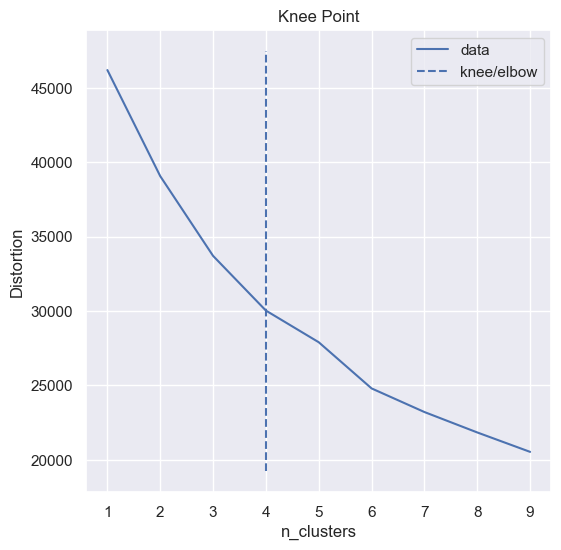

In [211]:
# Plot inertia plot and curve
kneedle = KneeLocator(
    num_clusters, 
    inertia_list, 
    S=2, 
    curve="convex", 
    direction="decreasing"
)
kneedle.plot_knee()
plt.xlabel('n_clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'silhouette score')

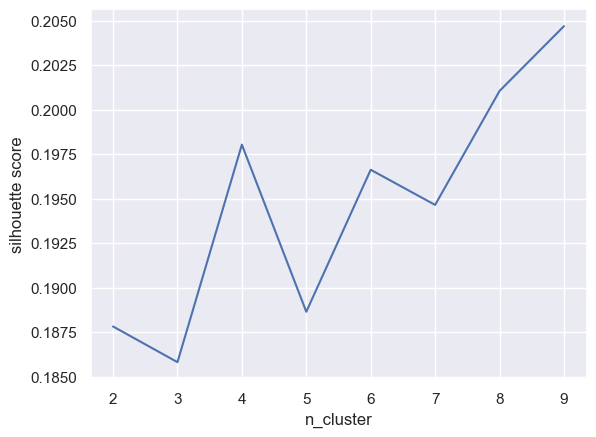

In [45]:
plt.plot(num_clusters, silhouette_score_list)
plt.xlabel('n_cluster')
plt.ylabel('silhouette score')

In [214]:
# Perform clustering for different number of clusters
#GM

from sklearn.mixture import GaussianMixture

# Storage for silhouette scores
silhouette_score_list_EM = []
EM_bic_list=[]
EM_aic_list=[]
EM_ll_list=[]


for k in num_clusters:

    gm = GaussianMixture(n_components=k, random_state=0,init_params='k-means++')
    gm.fit(df_scaler)
    y_gm=gm.predict(df_scaler)

    
    silhouette_scr_EM = silhouette_score(df_scaler,y_gm) 
    EM_bic=gm.bic(df_scaler)
    EM_aic=gm.aic(df_scaler)
    EM_ll=gm.score(df_scaler)
    
    # Calculate and store inertia & silhouette score
    
  #  silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list_EM.append(silhouette_scr_EM)
    EM_bic_list.append(EM_bic)
    EM_aic_list.append(EM_aic)
    EM_ll_list.append(EM_ll)

Text(0, 0.5, 'Average silhouette score')

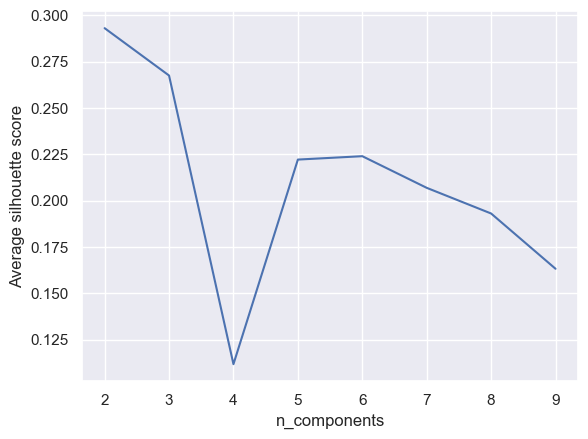

In [215]:
plt.plot(num_clusters, silhouette_score_list_EM)
plt.xlabel('n_components')
plt.ylabel('Average silhouette score')

Text(0, 0.5, 'log likeihood')

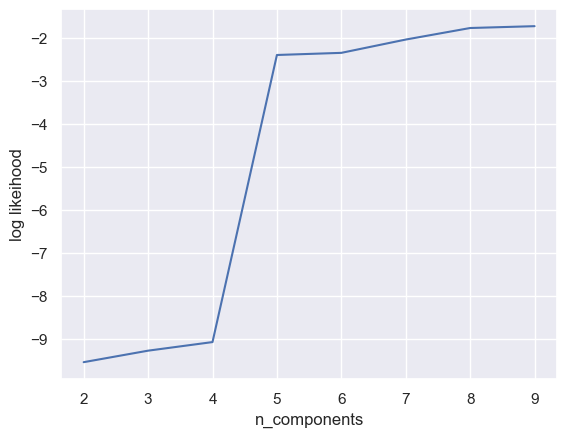

In [48]:
plt.plot(num_clusters, EM_ll_list)
plt.xlabel('n_components')
plt.ylabel('log likeihood')

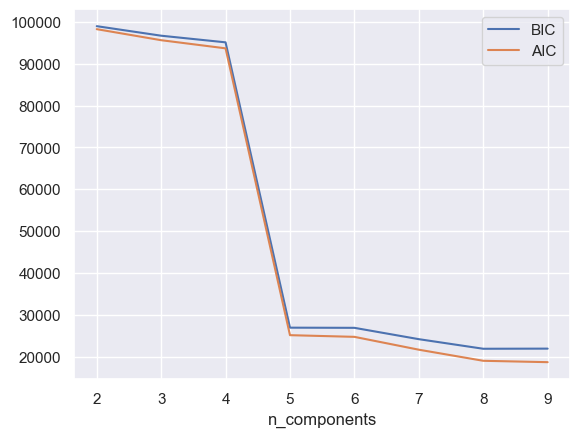

In [49]:
plt.plot(num_clusters, EM_bic_list, label='BIC')
plt.plot(num_clusters, EM_aic_list, label='AIC')
plt.xlabel('n_components')
plt.legend(loc='best')
plt.show()

In [50]:
## Dimensionality Reduction

Text(0, 0.5, 'Variance Explained')

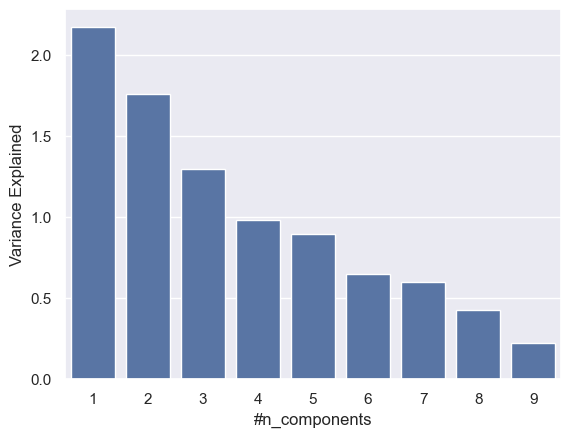

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(df_scaler)

sns.barplot(x=list(range(1,10)), y=pca.explained_variance_)
plt.xlabel('#n_components')
plt.ylabel('Variance Explained')

In [218]:
from collections import defaultdict
pca_km_res = {}
component_counts = [1,2,3,4,5,6,7,8,9]
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_pca = PCA(n_components=cc, random_state=0,)
    tmp_X_tr = tmp_pca.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
    
    # Perform k means clustering
        kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto')
        kmeans.fit(tmp_X_tr)
        y_kmean = kmeans.predict(tmp_X_tr)

       # insertia_list = km.inertia_
  #      silhouette_scr = silhouette_score(tmp_X_tr,y_kmean) 
        tmp_res[k]['dist'] = kmeans.inertia_
        tmp_res[k]['sil']=silhouette_scr
    pca_km_res[cc]=tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components
Doing 5 components
Doing 6 components
Doing 7 components
Doing 8 components
Doing 9 components


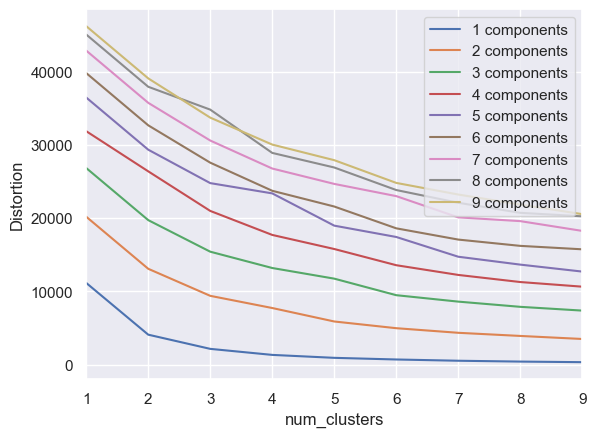

In [219]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_km_res[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

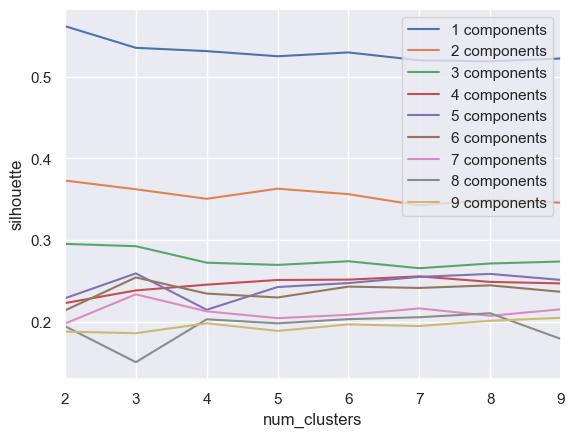

In [55]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_km_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()


In [56]:
#PCA for EM
from collections import defaultdict
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
component_counts = [1, 2, 3, 4,5,6,7,8,9]
pca_gm_res={}

for cc in component_counts:
    tmp_pca = PCA(n_components=cc, random_state=0)
    tmp_X_tr = tmp_pca.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
        tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    pca_gm_res[cc] = tmp_res

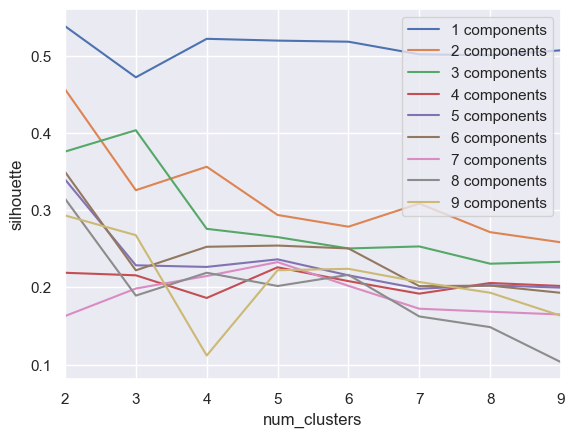

In [57]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_gm_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

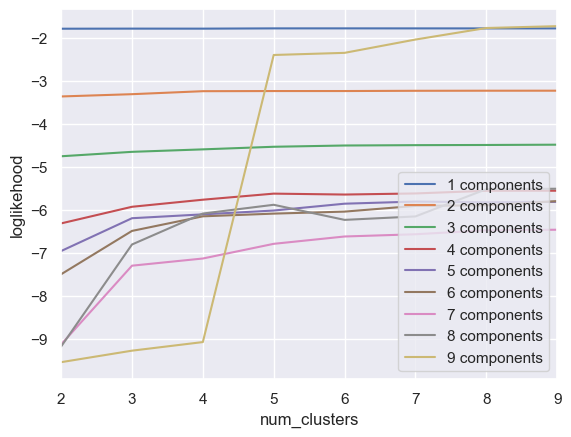

In [58]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_gm_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('loglikehood')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [59]:
# ICA reduction

In [221]:
from sklearn.decomposition import FastICA
from scipy.stats import describe, kurtosis

ica = FastICA(
    n_components=10,
    random_state=0,
    max_iter=500,
    whiten="arbitrary-variance"
)
X_trans = ica.fit_transform(df_scaler)
kurt_df = pd.DataFrame(kurtosis(X_trans, axis=0),columns=['kurtosis'])
#kurt_df.sort_values(by='kurtosis', ascending=False)
kurt_df
#X_trans.shape


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 9
  warnings.warn(


,kurtosis
0,6.842360
1,-0.846512
2,1.394159
3,1.890503
4,357.438240
5,87.442701
6,12.764510
7,76.803332
8,-1.677615


In [61]:
from sklearn.metrics import mean_squared_error
component_counts = [1,2,3,4,5,6,7,8,9]
total_kurtosis = {}
rmse=[]

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=0,
        n_components=component_count,
        whiten="arbitrary-variance"
    )
    tmp_X_tr = tmp_ica.fit_transform(df_scaler)
    total_kurtosis[component_count] = np.abs(kurtosis(tmp_X_tr, axis=0)).sum()
    A_=tmp_ica.mixing_
 #   rmse[component_count] = mean_squared_error(df_scaler, np.dot(tmp_X_tr, A_.T) + tmp_ica.mean_, squared=False)





(1.0, 9.0)

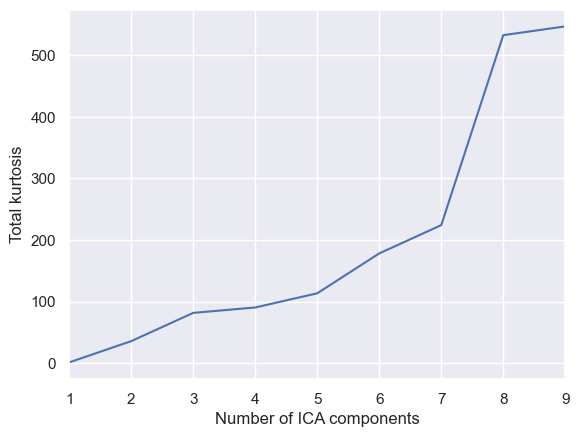

In [222]:
pd.Series(total_kurtosis).plot()
plt.ylabel('Total kurtosis')
plt.xlabel('Number of ICA components')
plt.xlim([1,9])

In [63]:
ica7 = FastICA(
    random_state=0,
    n_components=9,
)
X_tr7 = ica7.fit_transform(df_scaler)
kurt_df7 = pd.DataFrame(kurtosis(X_tr7, axis=0), columns=['kurtosis'])
kurt_df7.sort_values(by='kurtosis', ascending=False)

,kurtosis
4,357.438240
5,87.442701
7,76.803332
6,12.764510
0,6.842360
3,1.890503
2,1.394159
1,-0.846512
8,-1.677615


In [223]:
normed = ica7.components_[4] / np.linalg.norm(ica7.components_[4])
np.set_printoptions(suppress=True)
# normed.astype(np.float)
s = pd.Series(normed)
df_scaler.columns[s.abs() > 0.3]


Index(['Gender', 'Cr'], dtype='object')

In [224]:
s

0    0.022666
1   -0.326134
2    0.077122
3   -0.010647
4    0.010088
5    0.030764
6   -0.005184
7    0.932383
8   -0.129027
dtype: float64

In [227]:
#ICA for kmeans
ica_km_results = {}
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_dr = FastICA(n_components=cc, random_state=0,max_iter=500,whiten="arbitrary-variance")
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
    #    tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    ica_km_results[cc] = tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components
Doing 5 components
Doing 6 components
Doing 7 components
Doing 8 components
Doing 9 components


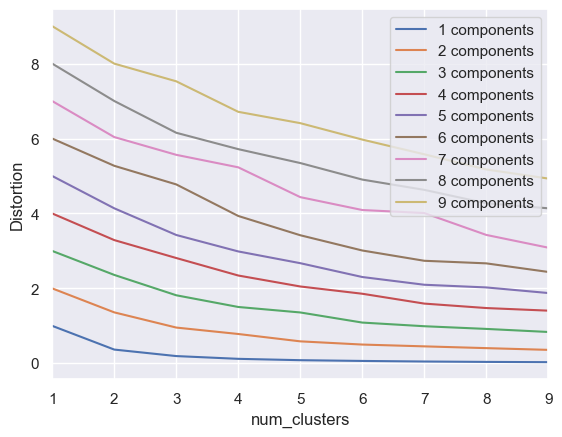

In [229]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

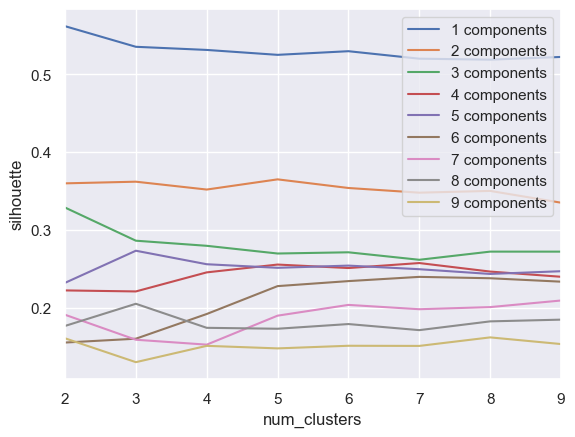

In [68]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [230]:
#ICA for EM
ica_em_res = {}
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_dr = FastICA(n_components=cc, random_state=0,max_iter=500,whiten="arbitrary-variance")
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
   #     tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    ica_em_res[cc] = tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components
Doing 5 components
Doing 6 components
Doing 7 components
Doing 8 components
Doing 9 components


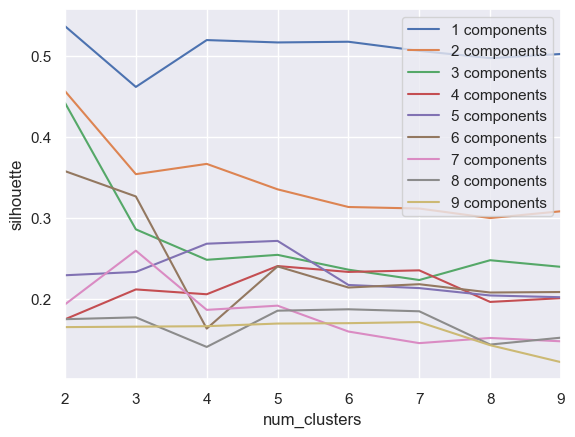

In [70]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_em_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

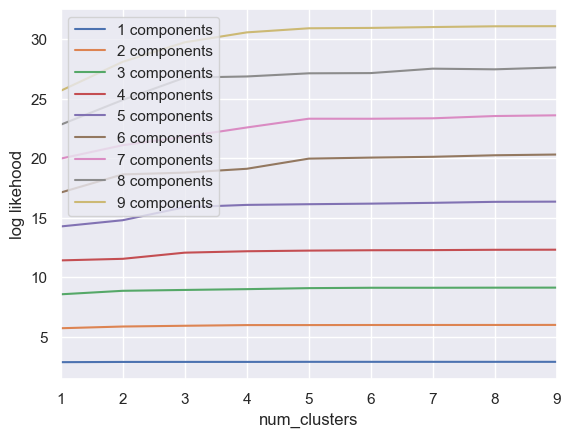

In [231]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_em_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('log likehood')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

In [72]:
# Randomized Projections

In [232]:
import numpy as np
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection

rp = SparseRandomProjection(
        random_state=0,
        n_components=2
    )
rp.fit(df_scaler)
rp_components = rp.components_
rp_components.shape


(2, 9)

In [233]:
df_scaler.shape

(5132, 9)

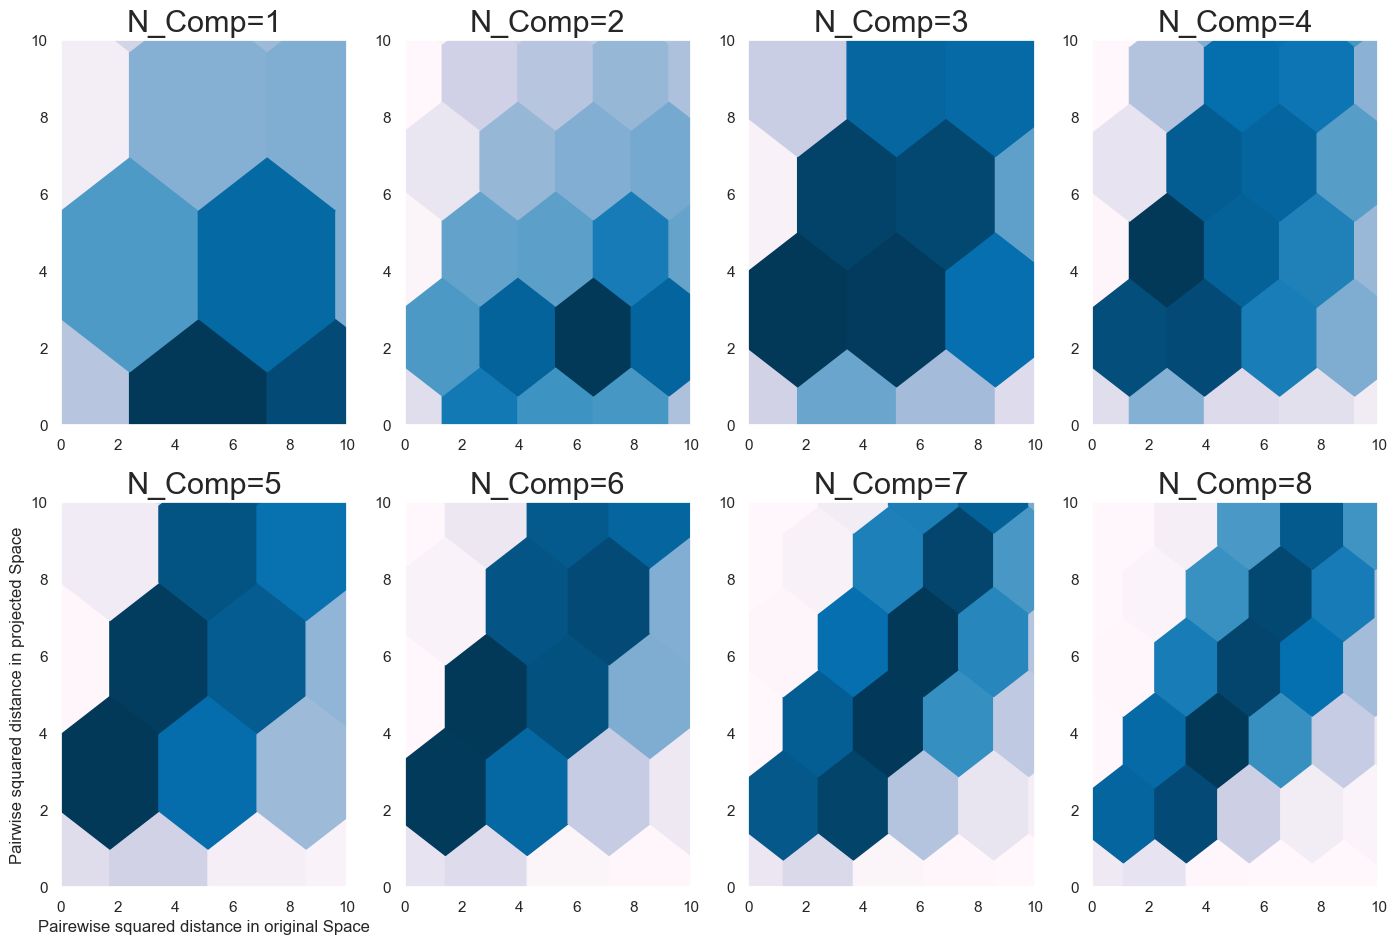

In [234]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import random_projection

f, ax = plt.subplots(2,4, figsize=(17, 11))
for i in range(1,9):
    n_comp = i
    transformer = random_projection.GaussianRandomProjection(n_components=n_comp, random_state=0)
    projected_data = transformer.fit_transform(df_scaler)

    dists = euclidean_distances(df_scaler, squared=True).ravel()
    nonzero = dists != 0
    dists = dists[nonzero]

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]
    i -= 1
    min_dist = min(projected_dists.min(), dists.min())
    max_dist = max(projected_dists.max(), dists.max())
    ax[i//4][i%4].hexbin(dists, projected_dists, gridsize=1000, cmap=plt.cm.PuBu,
               extent=[min_dist, max_dist, min_dist, max_dist])
    ax[i//4][i%4].set_title("N_Comp=%d" % n_comp, fontsize=22)
    ax[1][0].set_xlabel("Pairewise squared distance in original Space", fontsize=12)
    ax[1][0].set_ylabel("Pairwise squared distance in projected Space", fontsize=12)
    ax[i//4][i%4].set_xlim(0, 10)
    ax[i//4][i%4].set_ylim(0, 10)

In [235]:
# PR for kmean
component_counts = [1, 2, 3,4,5,6,7,8,9]
rp_km_results = {}
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_dr = SparseRandomProjection(n_components=cc, random_state=0)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
        
#         tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km, random_state=0)
        
 #       print('done k=%i in %.3f sec' % (k, t))
        tmp_res[k]['dist'] = km.inertia_
 #       tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    
    rp_km_results[cc] = tmp_res

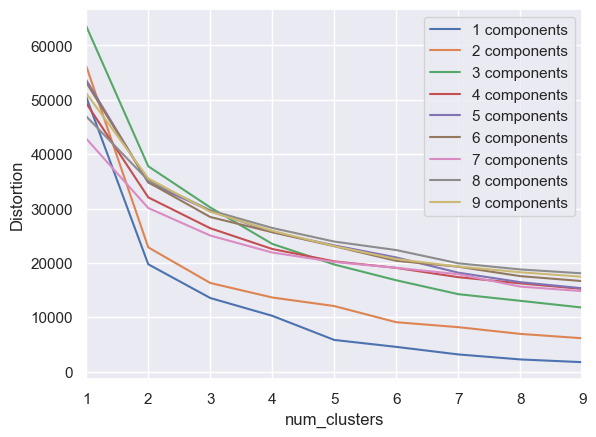

In [236]:
for cc in component_counts:
    plt.plot(num_clusters, [rp_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

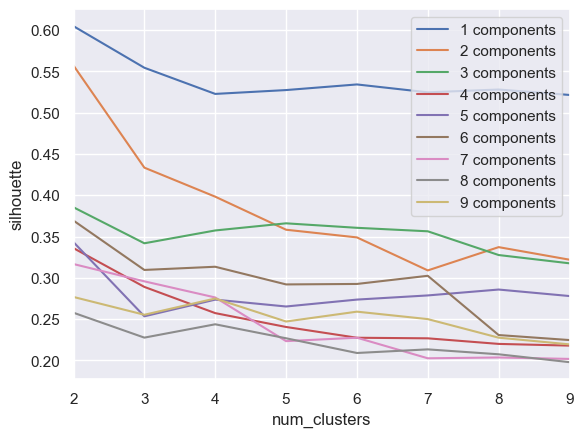

In [78]:
for cc in component_counts:
    plt.plot(num_clusters, [rp_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [79]:
# RP for EM

In [246]:
from collections import defaultdict
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
component_counts = [1, 2, 3, 4,5,6,7,8,9]
RP_gm_res={}

for cc in component_counts:
    tmp_dr = SparseRandomProjection(n_components=cc, random_state=0)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
   #     tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    RP_gm_res[cc] = tmp_res

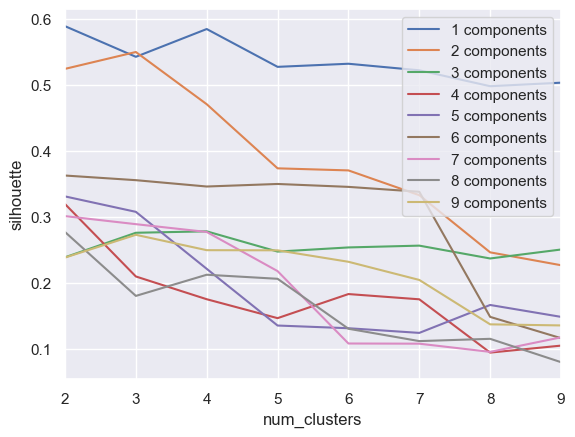

In [81]:
for cc in component_counts:
    plt.plot(num_clusters, [RP_gm_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

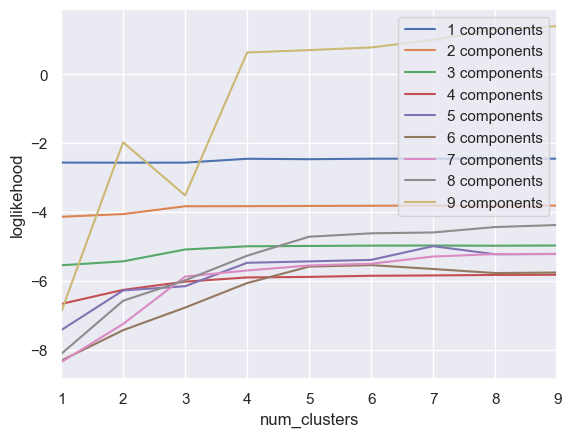

In [247]:
for cc in component_counts:
    plt.plot(num_clusters, [RP_gm_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('loglikehood')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

In [83]:
# non-linearL maniforld learning
# isomap

In [237]:
from sklearn.manifold import Isomap
df_scaler.shape



(5132, 9)

In [238]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(df_scaler)
X_transformed.shape

(5132, 2)

In [240]:
#isomap for kmean

In [239]:
# isomap for kmean
component_counts = [1, 2, 3,4,5,6,7,8,9]
iso_km_results = {}
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_dr = Isomap(n_components=cc)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
        
#         tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km, random_state=0)
        
 #       print('done k=%i in %.3f sec' % (k, t))
        tmp_res[k]['dist'] = km.inertia_
   #     tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    
    iso_km_results[cc] = tmp_res

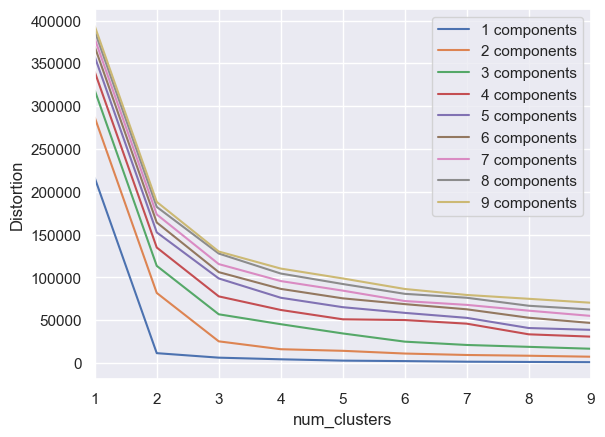

In [240]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

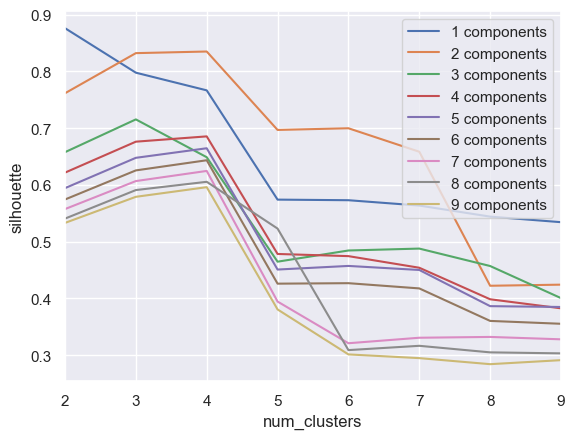

In [89]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [241]:
# isomap for EM
component_counts = [1, 2, 3,4,5,6,7,8,9]
iso_em_res = {}
num_clusters = [1,2,3,4,5,6,7,8,9]

for cc in component_counts:
    tmp_dr = Isomap(n_components=cc)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
   #     tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    iso_em_res[cc] = tmp_res

In [242]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_em_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
# plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

KeyError: 'sil'

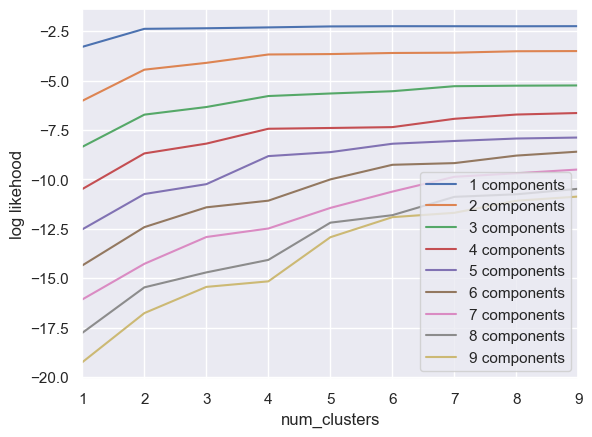

In [244]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_em_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('log likehood')
plt.legend(loc='best')
plt.xlim([1,9])
plt.show()

In [93]:
df_scaler.shape

(5132, 9)

In [94]:
tmp_X_tr.shape

(5132, 9)

In [95]:
tmp_dr = Isomap(n_components=1)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [96]:
tmp_X_tr.shape

(5132, 1)

In [97]:
tmp_X_tr

array([[ 4.85550889],
       [-5.62743133],
       [-6.58620636],
       ...,
       [-4.69362573],
       [ 8.59411924],
       [-5.97042751]])

In [98]:
tmp_dr = Isomap(n_components=2)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [99]:
tmp_X_tr

array([[ 4.85550889,  0.83573558],
       [-5.62743133, -0.02109567],
       [-6.58620636,  1.10171188],
       ...,
       [-4.69362573,  0.05586093],
       [ 8.59411924,  2.08697947],
       [-5.97042751, -1.99858489]])

In [100]:
df_1 = pd.read_csv("Diabetes_Classification.csv")

In [101]:
df_1

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [102]:
X_1 = df_1.drop("Diagnosis",axis=1)
y_1= df_1["Diagnosis"]

In [103]:
y_1

0       0
1       0
2       0
3       0
4       0
       ..
5127    1
5128    1
5129    1
5130    1
5131    1
Name: Diagnosis, Length: 5132, dtype: int64

In [104]:
X_1

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00
...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33


In [105]:
df_x = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [106]:
df_x

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,50,0,24,4.20,0.90,2.40,1.40,46.0,4.70
1,26,1,23,3.70,1.40,1.10,2.10,62.0,4.50
2,33,1,21,4.90,1.00,0.80,2.00,46.0,7.10
3,45,0,21,2.90,1.00,1.00,1.50,24.0,2.30
4,50,0,24,3.60,1.30,0.90,2.10,50.0,2.00
...,...,...,...,...,...,...,...,...,...
5127,54,1,23,5.00,1.50,1.24,2.98,77.0,3.50
5128,50,0,22,4.37,2.09,1.37,2.29,47.3,4.40
5129,67,1,24,3.89,1.38,1.14,2.17,70.6,4.73
5130,60,0,29,5.91,1.29,1.73,2.85,50.2,7.33


In [107]:


# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
df_scaler = standard_scaler.fit_transform(df_x)
df_scaler = pd.DataFrame(
    data=df_scaler, 
    columns=['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL','LDL','Cr', 'BUN']
)

In [108]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156
...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481


In [109]:
y_1.shape

(5132,)

In [273]:
#PCA reduction

In [110]:
tmp_pca = PCA(n_components=2, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [112]:
# import NN model
NN = MLPClassifier()
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [113]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [114]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [115]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 82.46%


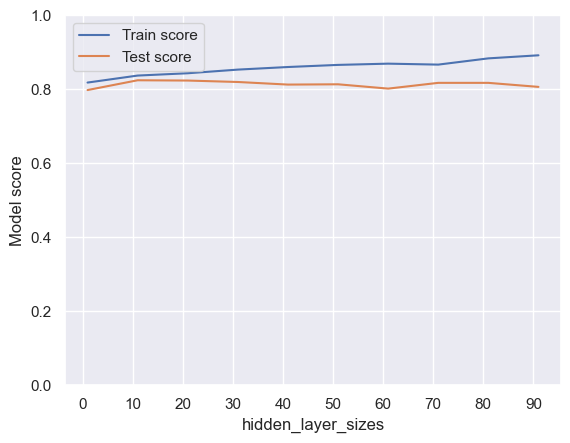

In [116]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [117]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))


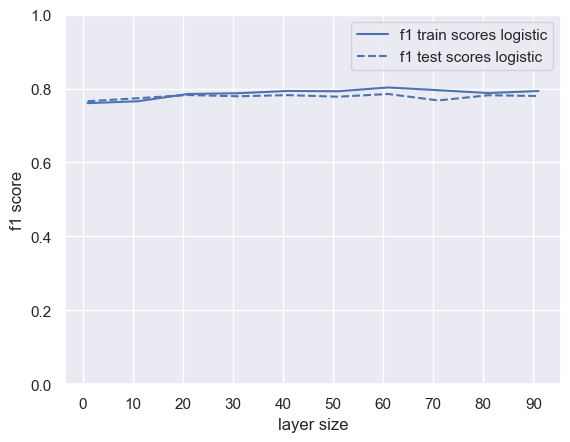

In [118]:

plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [119]:
# above is for original data

In [120]:
# 2 component

In [121]:
tmp_pca = PCA(n_components=2, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [122]:
# import NN model
NN = MLPClassifier()

In [123]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [124]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 73.89%


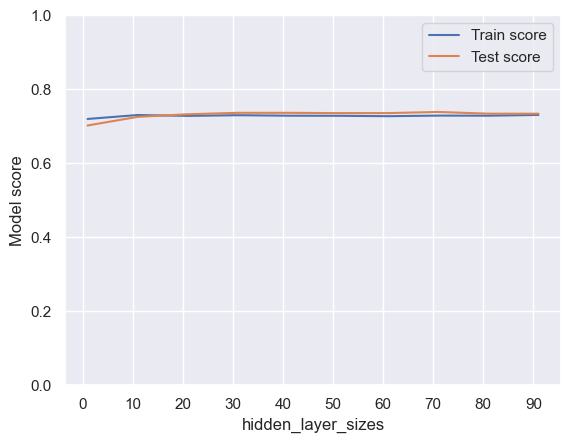

In [125]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [126]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

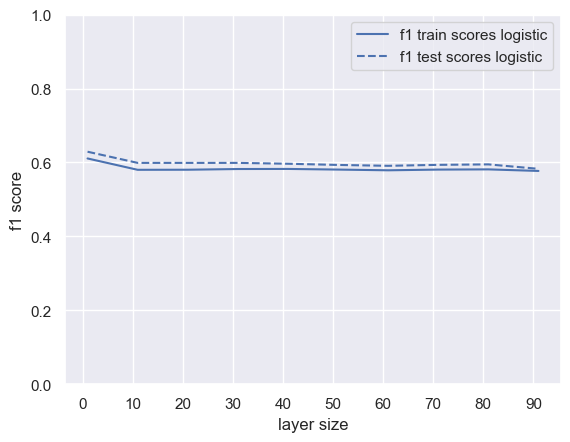

In [127]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [128]:
# 4 compoenet

In [129]:
tmp_pca = PCA(n_components=4, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [130]:
# import NN model
NN = MLPClassifier()

In [131]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [132]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 81.53%


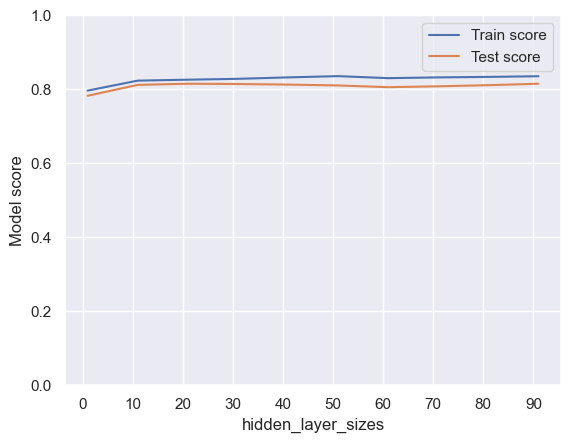

In [133]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [134]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

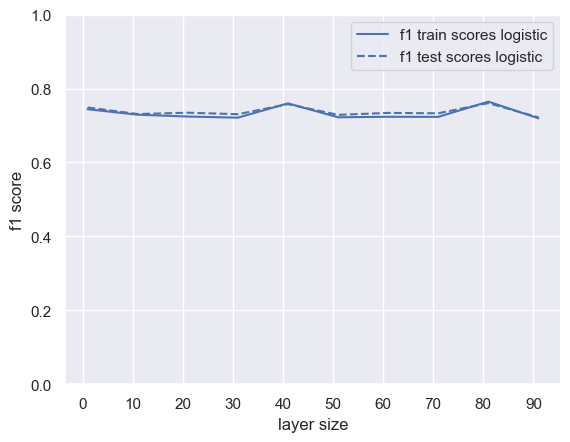

In [135]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [136]:
# ICA reduction 2 component

In [137]:
tmp_dr = FastICA(n_components=2, random_state=0,max_iter=500,whiten="arbitrary-variance")
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [138]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [139]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 70.07%


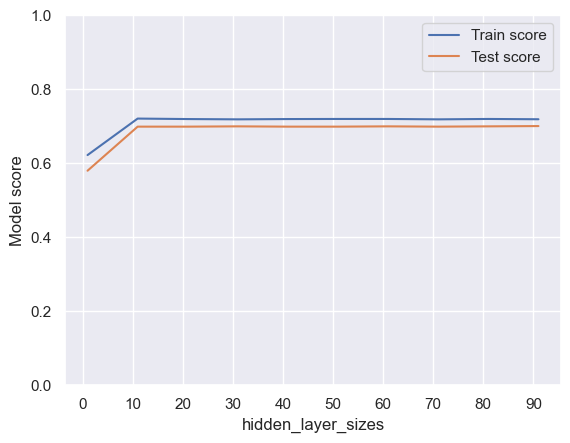

In [140]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [141]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

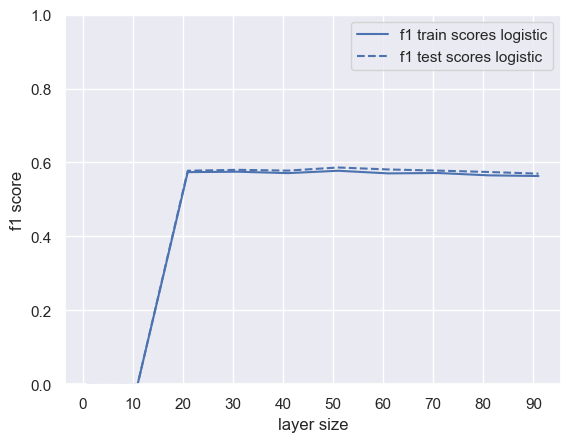

In [142]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [143]:
# ICA reduction 4 component

In [144]:
tmp_dr = FastICA(n_components=4, random_state=0,max_iter=500,whiten="arbitrary-variance")
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [145]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [146]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 78.64%


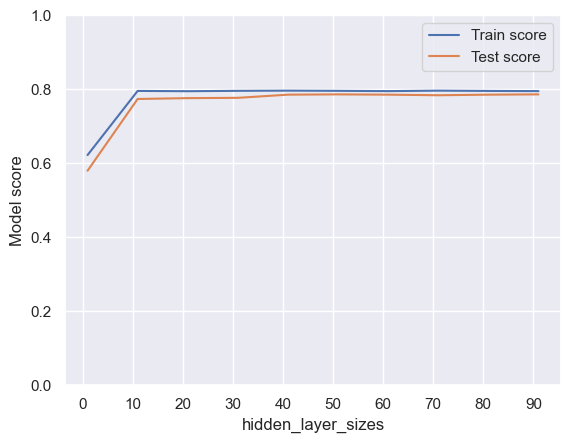

In [147]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [148]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

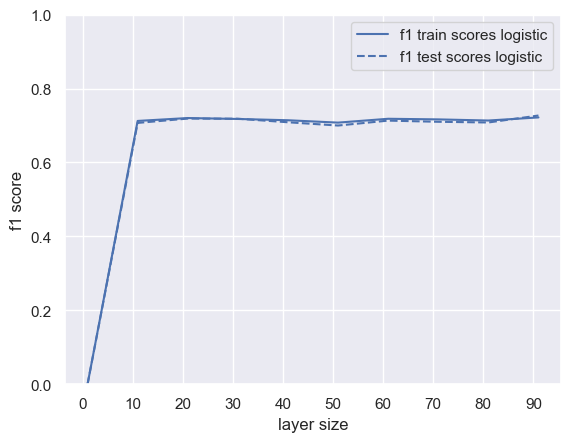

In [149]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [150]:
# RP reduction 2 

In [151]:
tmp_dr = SparseRandomProjection(n_components=2, random_state=0)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)
tmp_res = defaultdict(dict)

In [152]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [153]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 65.16%


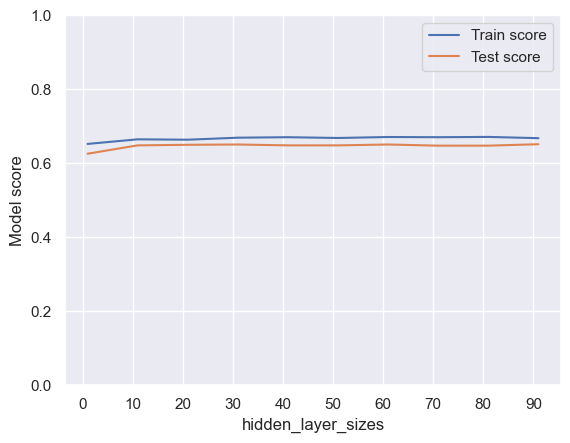

In [154]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [155]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

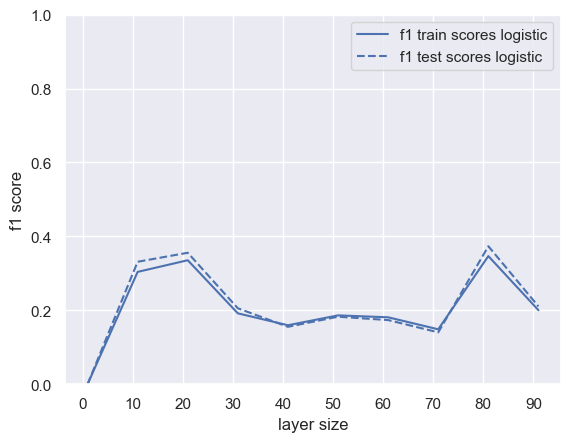

In [156]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [157]:
#RP reduction 4

In [158]:
tmp_dr = SparseRandomProjection(n_components=4, random_state=0)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [159]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [160]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 77.01%


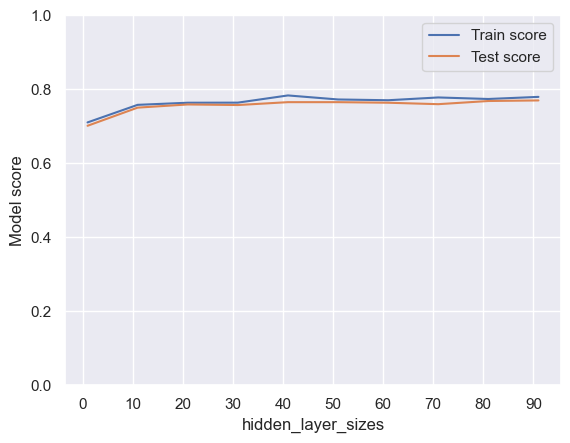

In [161]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [162]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

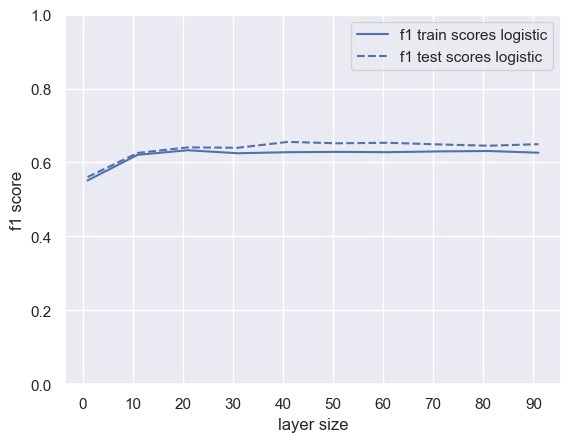

In [163]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [164]:
# isomap 2 compoent

In [165]:
tmp_dr = Isomap(n_components=2)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [166]:
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [167]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 73.11%


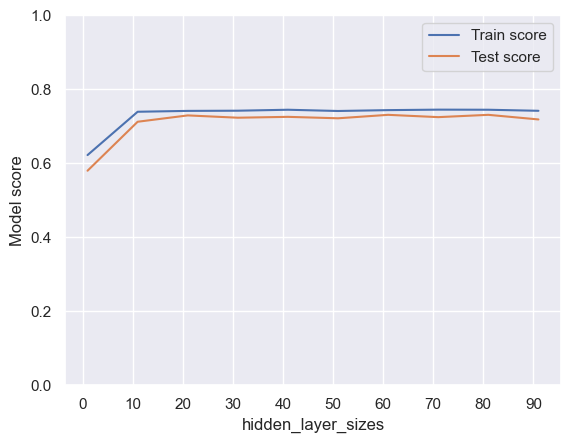

In [168]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [169]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

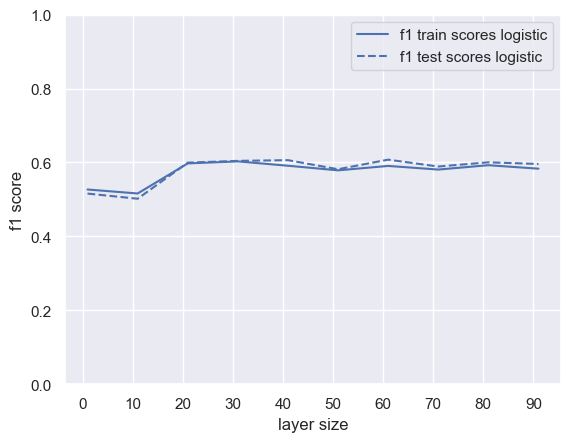

In [170]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [171]:
tmp_dr = Isomap(n_components=4)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [172]:
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [173]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 79.27%


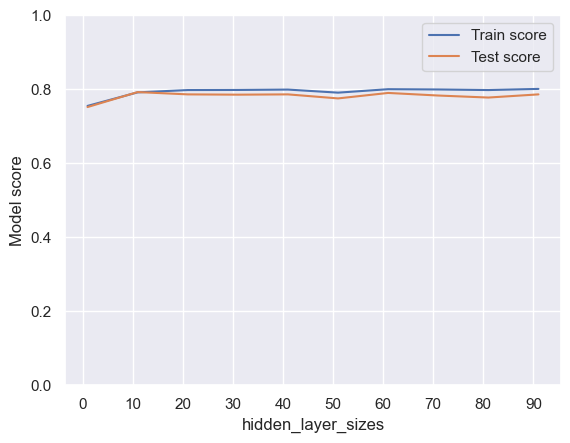

In [174]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [175]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

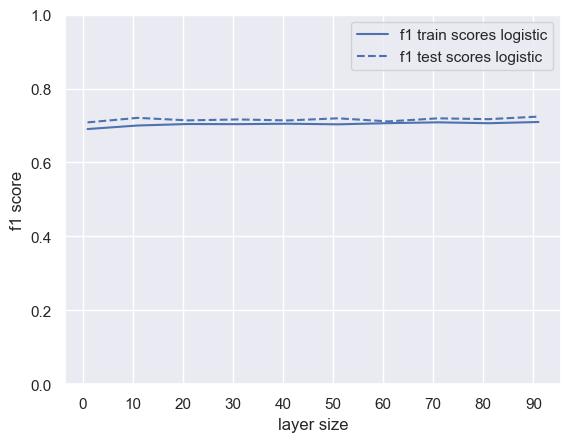

In [176]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [177]:
kmeans = KMeans(n_clusters=2,random_state=0, n_init='auto')
kmeans.fit(df_scaler)
y_kmean = kmeans.predict(df_scaler)

In [178]:
y_kmean

array([0, 0, 0, ..., 0, 1, 1])

In [179]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156
...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481


In [180]:
df_scaler.loc[:,"y_kmean"]=y_kmean  # add cluster as new feature

In [181]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,y_kmean
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616,0
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026,0
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309,0
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540,0
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156,0
...,...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078,0
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231,0
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854,0
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481,1


In [182]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [183]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 82.77%


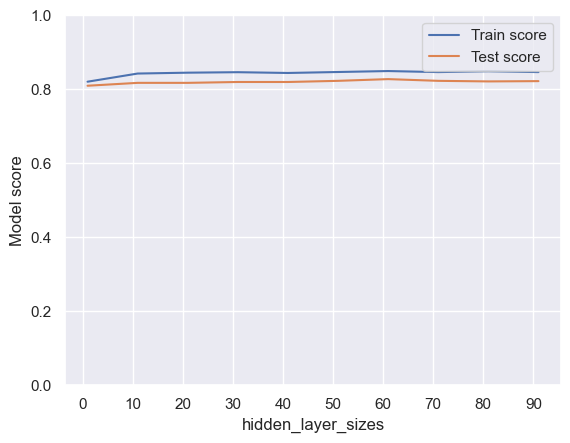

In [184]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [185]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

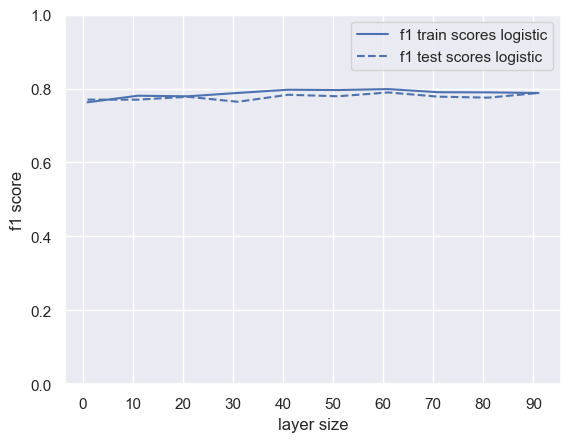

In [186]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [187]:
df_scaler = df_scaler.drop("y_kmean",axis=1)

In [188]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156
...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481


In [189]:
kmeans = KMeans(n_clusters=4,random_state=0, n_init='auto')
kmeans.fit(df_scaler)
y_kmean = kmeans.predict(df_scaler)

In [190]:
df_scaler.loc[:,"y_kmean"]=y_kmean  # add cluster as new feature

In [191]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,y_kmean
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616,0
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026,1
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309,1
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540,0
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156,0
...,...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078,1
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231,0
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854,1
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481,2


In [192]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [193]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 82.77%


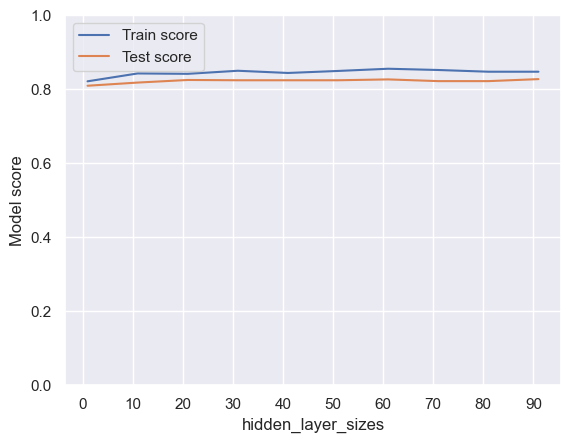

In [194]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [195]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,y_kmean
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616,0
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026,1
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309,1
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540,0
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156,0
...,...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078,1
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231,0
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854,1
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481,2


In [196]:
df_scaler = df_scaler.drop("y_kmean",axis=1)

In [197]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156
...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481


In [198]:
# use EM cluster
gm = GaussianMixture(n_components=2, random_state=0,init_params='k-means++')
gm.fit(df_scaler)
y_gm=gm.predict(df_scaler)

In [199]:
y_gm

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [200]:
df_scaler.loc[:,"y_gm"]=y_gm  # add cluster as new feature

In [201]:
df_scaler

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,y_gm
0,0.074725,-1.317425,-0.143427,-0.666247,-0.617462,0.776604,-1.601683,-0.882533,-0.116616,0
1,-1.633774,0.759057,-0.377247,-1.165770,-0.240652,-0.474903,-0.861202,-0.320965,-0.235026,0
2,-1.135462,0.759057,-0.844888,0.033086,-0.542100,-0.763712,-0.966985,-0.882533,1.304309,1
3,-0.281213,-1.317425,-0.844888,-1.965007,-0.542100,-0.571173,-1.495900,-1.654690,-1.537540,0
4,0.074725,-1.317425,-0.143427,-1.265675,-0.316014,-0.667443,-0.861202,-0.742141,-1.715156,0
...,...,...,...,...,...,...,...,...,...,...
5127,0.359474,0.759057,-0.377247,0.132991,-0.165290,-0.340126,0.069689,0.205506,-0.827078,0
5128,0.074725,-1.317425,-0.611067,-0.496409,0.279346,-0.214975,-0.660214,-0.836906,-0.294231,0
5129,1.284911,0.759057,-0.143427,-0.975951,-0.255724,-0.436395,-0.787154,-0.019121,-0.098854,0
5130,0.786599,-1.317425,1.025675,1.042123,-0.323550,0.131596,-0.067829,-0.735121,1.440481,0


In [202]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [203]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 82.77%


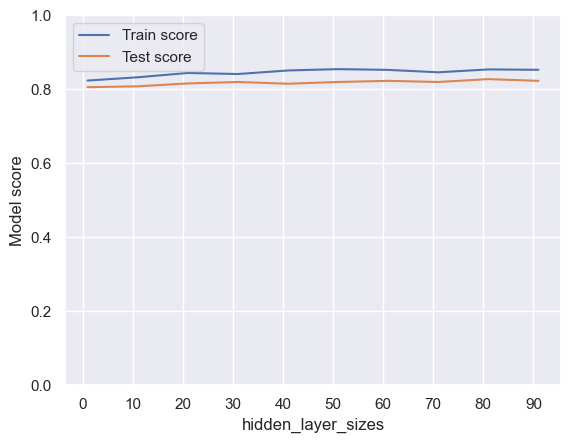

In [204]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [205]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

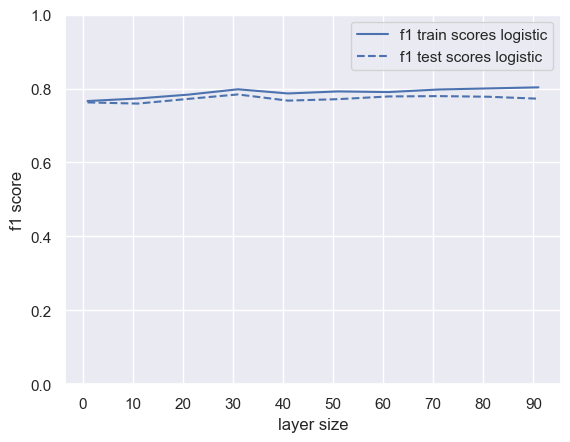

In [206]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [207]:
f1_test_scores_logistic

[0.7625354777672658,
 0.7593688362919132,
 0.771964461994077,
 0.7841239109390126,
 0.7673956262425448,
 0.7713444553483808,
 0.7786407766990291,
 0.7796278158667973,
 0.7778874629812438,
 0.7725918570009931]